In [101]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [78]:
# Loading Data as Data Frame
df = pd.read_csv('Viz-preprocessed.csv')

In [79]:
# Checking the Top five observations of the Data
df.head()

,Timestamp,RTU: Supply Air Temperature,RTU: Return Air Temperature,RTU: Circuit 1 Discharge Temperature,RTU: Circuit 1 Condenser Outlet Temperature,RTU: Circuit 1 Suction Temperature,RTU: Circuit 2 Discharge Temperature,RTU: Circuit 2 Suction Temperature,RTU: Circuit 1 Condenser Outlet Pressure,RTU: Circuit 1 Suction Pressure,...,VAV Box: Room 104 Air Temperature,VAV Box: Room 105 Air Temperature,VAV Box: Room 106 Air Temperature,VAV Box: Room 202 Air Temperature,VAV Box: Room 203 Air Temperature,VAV Box: Room 204 Air Temperature,VAV Box: Room 205 Air Temperature,VAV Box: Room 206 Air Temperature,AverageRoomTemp,AverageRoomHumi
0,2017-08-27 06:43:00,63.7804,74.6834,92.2,75.87,58.50,75.88,70.92,-441.3,142.7,...,69.54,69.52,70.06,67.9134,69.22,69.79,69.47,70.09,74.62790,50.830000
1,2017-08-27 06:44:00,62.9200,74.6834,119.2,96.10,59.00,73.93,71.32,-381.0,161.6,...,67.77,67.92,68.94,67.3800,65.89,67.17,66.57,67.71,74.55256,50.973333
2,2017-08-27 06:45:00,61.0000,74.6834,133.7,106.30,55.05,73.54,71.47,-348.3,162.4,...,65.85,66.06,67.38,65.2200,63.40,64.95,64.24,65.58,74.43922,51.076667
3,2017-08-27 06:46:00,58.6900,74.5700,144.1,123.90,49.69,117.00,49.95,-267.1,158.6,...,64.25,64.39,65.91,63.3500,61.47,63.06,62.38,63.79,74.27986,51.173333
4,2017-08-27 06:47:00,56.9800,74.4600,157.1,130.10,50.53,160.80,50.92,-203.6,160.9,...,62.32,62.54,64.23,61.1200,59.18,60.93,60.27,61.78,74.00950,50.926667


In [80]:
# Checking basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 47 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Timestamp                                    2610 non-null   object 
 1   RTU: Supply Air Temperature                  2610 non-null   float64
 2   RTU: Return Air Temperature                  2610 non-null   float64
 3   RTU: Circuit 1 Discharge Temperature         2610 non-null   float64
 4   RTU: Circuit 1 Condenser Outlet Temperature  2610 non-null   float64
 5   RTU: Circuit 1 Suction Temperature           2610 non-null   float64
 6   RTU: Circuit 2 Discharge Temperature         2610 non-null   float64
 7   RTU: Circuit 2 Suction Temperature           2610 non-null   float64
 8   RTU: Circuit 1 Condenser Outlet Pressure     2610 non-null   float64
 9   RTU: Circuit 1 Suction Pressure              2610 non-null   float64
 10  

In [81]:
# Checking for null values
df.isnull().sum()

Timestamp                                      0
RTU: Supply Air Temperature                    0
RTU: Return Air Temperature                    0
RTU: Circuit 1 Discharge Temperature           0
RTU: Circuit 1 Condenser Outlet Temperature    0
RTU: Circuit 1 Suction Temperature             0
RTU: Circuit 2 Discharge Temperature           0
RTU: Circuit 2 Suction Temperature             0
RTU: Circuit 1 Condenser Outlet Pressure       0
RTU: Circuit 1 Suction Pressure                0
RTU: Circuit 2 Discharge Pressure              0
RTU: Circuit 2 Suction Pressure                0
RTU: Supply Air Volumetric Flow Rate           0
RTU: Electricity                               0
RTU: Natural Gas                               0
Terminal: Room 102 Air Humidity                0
Terminal: Room 104 Air Humidity                0
Terminal: Room 106 Air Humidity                0
Terminal: Room 102 Air Temperature             0
Terminal: Room 103 Air Temperature             0
Terminal: Room 104 A

In [82]:
# Droping Timestamp column
df.drop(['Timestamp'],1, inplace = True)

In [83]:
# Scaling the Data
for i in df.columns:
    df[i] = scaler.fit_transform(df[[i]])

In [84]:
# Separating Dependent and Independent Variables
y = df['HVAC System: Electricity']
x = df.drop(['HVAC System: Electricity'], 1)

In [85]:
# Separating Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.2)

## Model Building

#### Linear Regression

In [86]:
linear = LinearRegression()

In [87]:
np.mean(cross_val_score(linear, X_train, y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-0.07096158314277902

#### Lasso Regression

In [88]:
lass = Lasso()
lass.fit(X_train, y_train)
np.mean(cross_val_score(lass, X_train, y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-0.8407494719209039

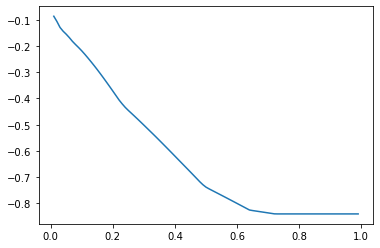

,alpha,error
0,0.01,-0.08605


In [114]:
alpha = []
error = []

for i in range(1, 100):
    alpha.append(i/100)
    lm_la = Lasso(alpha = (i/100))
    error.append(np.mean(cross_val_score(lm_la, X_train, y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha, error)
plt.show()

data = {'alpha':alpha, "error": error}
fd = pd.DataFrame(data)
fd[fd['error'] == fd['error'].max()]

In [111]:
best_lass = Lasso(alpha = 0.01)
best_lass.fit(X_train, y_train)
best_lass_pred = best_lass.predict(X_test)
print(mean_absolute_error(y_test, best_lass_pred))

0.09480500921591219


#### Random Forest Regressor

In [89]:
rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-0.06713512777671357

### Using GridSearchCV

In [90]:
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error', cv = 3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [97]:
# Getting the best Estimator
print('best score: ',gs.best_score_)
print('best estimator/model: ',gs.best_estimator_)
best = gs.best_estimator_

best score:  -0.06556796327728465
best estimator/model:  RandomForestRegressor(criterion='mse', n_estimators=120)


In [100]:
# Predicting the values of y_test
y_pred = best.predict(X_test)

#### Model Evaluation

In [113]:
print(mean_absolute_error(y_test, y_pred))

0.06146472499614632


The RandomForestRegressor with GridSearchCV outperformed all other models.
### *RandomForestRegressor Model 'best'* - **MAE: 0.06146472499614632**